<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Machine Learning</center>

# Challenge S3: Detección del cáncer

## Objetivos

Los objetivos de este challenge es hacer un modelo capaz de detectar el cáncer.

## Configuración del entorno

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import scikitplot as skplt

## Dataset

En este caso vamos a utilizar un dataset real de análisis de cáncer de mama del Breast Cancer Center de Wisconsin. Este dataset está disponible en `sklearn` así que cargarlo es tan fácil como:

In [2]:
from sklearn import datasets
dataset = sklearn.datasets.load_breast_cancer()

Como siempre, una vez cargado debemos inspeccionar y comprender el dataset:

In [3]:
print(dataset.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [4]:
print(dataset.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

Como se indica en la descripción del dataset, éste consta de 569 instancias con 30 atributos numéricos cada uno.

In [5]:
dataset_X = dataset.data

In [6]:
dataset_X.shape

(569, 30)

In [7]:
print(dataset_X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


Este dataset clasifica los casos en cáncer maligno ($0$) o benigno ($1$).

In [8]:
print(dataset.target_names)

['malignant' 'benign']


In [9]:
dataset_y = dataset.target

In [10]:
dataset_y.shape

(569,)

In [11]:
print(dataset_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

## ¿Este dataset está balanceado o desbalanceado?

In [12]:
np.bincount(dataset_y)


array([212, 357])

212 casos malignos y 357 benignos

In [13]:
np.bincount(dataset.target)[0]/dataset.target.shape[0]

0.37258347978910367

37% de casos malignos y 63% benignos por lo que se puede decir que existe cierto balanceo

## ¿Cual sería el clasificador más sencillo con mejor % de acierto que se te ocurre? ¿es útil en la práctica?

Un clasificador Dummy del total acertaría 63% pero no sería representativo al no ser vcapces de detectar tumores malignos.

In [14]:
dc_most_frequent = DummyClassifier(strategy='most_frequent', random_state=None)

In [15]:
cross_val_score(dc_most_frequent, dataset_X, dataset_y, scoring ='accuracy')

array([0.62631579, 0.62631579, 0.62962963])

## Entrena un modelo y evalúa su rendimiento

In [44]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_y, test_size=.3, random_state=42)

knn = KNeighborsClassifier()
nn_3 = KNeighborsClassifier(n_neighbors=3)
nn_3.fit(X_train, y_train)
print(nn_3.score(X_test, y_test))

0.9415204678362573


In [45]:
score = cross_val_score(knn, dataset_X, dataset_y, scoring = 'accuracy')

In [46]:
print(score)

[0.9        0.94736842 0.92063492]


## Dibuja la matriz de confusión

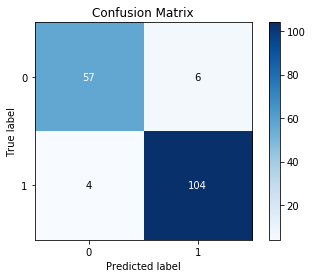

In [47]:
y_predicted = nn_3.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_predicted)

## Si tengo un paciente con un cáncer benigno (1), ¿qué probabilidad hay de que el modelo lo clasifique como cáncer benigno (1)? 

In [49]:
104/(104+4)

0.9629629629629629

## Si tengo un paciente con un cáncer maligno (0), ¿qué probabilidad hay de que el modelo lo clasifique como cáncer benigno (1)? 

In [48]:
57/(57+6)

0.9047619047619048

## Si tengo un paciente con un cáncer benigno (1), ¿qué probabilidad hay de que el modelo lo clasifique como cáncer maligno (0)? 

In [50]:
6/(57+6)

0.09523809523809523

## ¿Qué podrías concluir del clasificador?

Es un casificador con un buen porcentaje de acierto, aunque existe un riesgo porque el porcentaje de error es mayor en los casos crítico. Se podría combinar con una clasificación humana, como método complementario

## (extra) ¿Se te ocurre alguna manera de mejorarlo?

Se podrían mejorar los porcentajes de acierto y error con un pre-procesado del dataset en un primer lugar. Además se podrían estudiar distintos valores de K o entrenar el dataset de forma distinta y observar los resultados.